**Create the matrices representing the following convolution kernels and visualize each of them in a separate Figure:**

In [ ]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import math as m
import pandas as pd
from sys import argv

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

### **Plot Graph**

In [ ]:
def plot_graph(X, Y, Z):
    
    fig = plt.figure()
    ax = plt.axes(projection="3d")
    ax = fig.add_subplot(111, projection='3d')

    X=np.array(X)
    Y=np.array(Y)
    Z=np.array(Z)

    filter_size=len(X)
    filter_size=m.sqrt(filter_size)
    filter_size=int(filter_size)

    # transforming x,y,z into 2D arrays for plotting
    xs = X.reshape((filter_size, filter_size))
    ys = Y.reshape((filter_size, filter_size))
    zs = Z.reshape((filter_size, filter_size))

    # passing x,y,z points to plot
    ax.plot_wireframe(xs, ys, zs, color='black')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.show()

    # fig = plt.figure(figsize=(20,10))
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    # 3D surface plot
    ax.plot_surface(xs, ys, zs, rstride=1, cstride=1, cmap='binary_r', edgecolor='black')

    ax.set_title('Surface plot');
    plt.show()
    # plt.show()

# **Gaussian Filters**

In [ ]:
def create_gaussian_filter(M , N, q):

    if (M % 2)==0:
        print('M =',M,'Dimention Should be the even value.')
        return None
    
    if (N % 2)==0:
        print('N = ',N,'Dimention Should be the even value.')
        return None
    
    gaussian_filter = np.full((N, M), fill_value = 0.0)

    cX = N // 2
    cY = N // 2 

    X = []
    Y = []
    Z = []
    
    for i in range(0, M):
        for j in range(0, N):
            x = i - cX 
            y = j - cY
            
            val = round ((1 / (2 * np.pi * q**2))* np.exp(-(x**2 + y**2)/ (2 * q**2) ) , 4)
            gaussian_filter[i, j] = val

            #add values for graph
            X.append(x)
            Y.append(y)
            Z.append(val)
               
    plot_graph(X, Y, Z)

    return gaussian_filter

## 1) Gaussian of size 11 × 11 with 𝜎 = 3

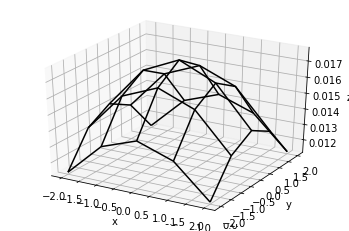

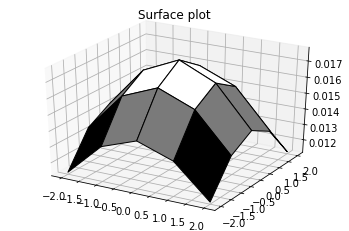

[[0.0113 0.0134 0.0142 0.0134 0.0113]
 [0.0134 0.0158 0.0167 0.0158 0.0134]
 [0.0142 0.0167 0.0177 0.0167 0.0142]
 [0.0134 0.0158 0.0167 0.0158 0.0134]
 [0.0113 0.0134 0.0142 0.0134 0.0113]]


In [ ]:
X = 5
Y = 5
sigma =  3
gFilter3 = create_gaussian_filter(X, Y, sigma)

print(gFilter3)

gFilter3## 2) Gaussian of size 11 × 11 with 𝜎 = 5

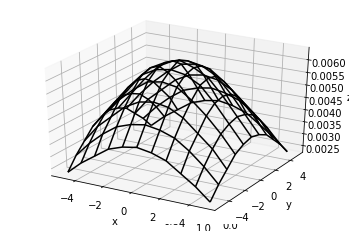

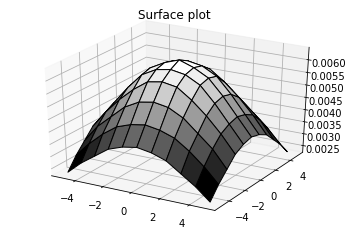

In [ ]:
X = 11
Y = 11
sigma =  5
gFilter3 = create_gaussian_filter(X, Y, sigma)

# **Derivative Filter**

## 3) Derivative along 𝑋 of size 1 × 3

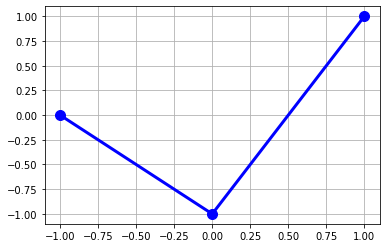

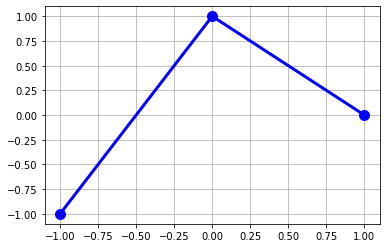

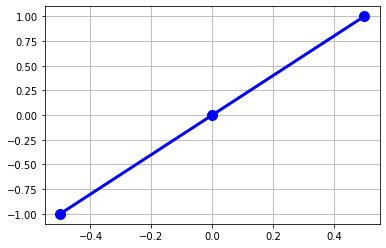

In [ ]:
Y  = [-1,0, 1]

FD_X = [0, -1, 1] 
BD_X = [-1, 1, 0]
CD_X = [-0.5, 0, 0.5]

plt.plot( Y, FD_X ,'bo-', linewidth=3, markersize=10)
plt.grid()
plt.savefig("FD_X.png",dpi=600)
plt.show()

plt.plot( Y,  BD_X,'bo-', linewidth=3, markersize=10)
plt.grid()
plt.savefig("BD_X.png",dpi=600)
plt.show()

plt.plot(  CD_X,Y,'bo-', linewidth=3, markersize=10)
plt.grid()
plt.savefig("CD_X.png",dpi=600)
plt.show()


## 4) Derivative along 𝑌 of size 1 × 3,

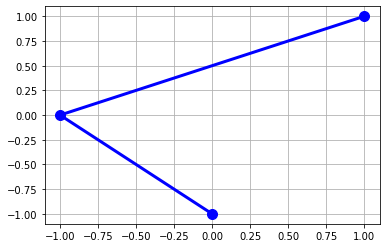

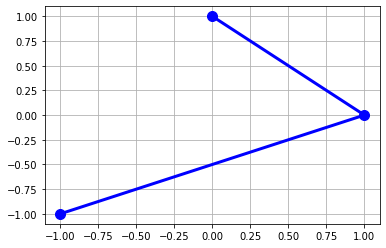

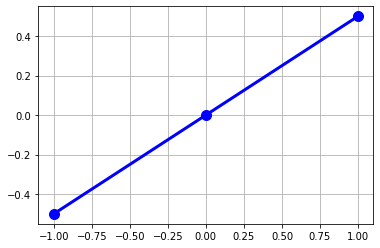

In [ ]:

X = [-1, 0, 1]

FD_Y = [0, -1, 1] 
BD_Y = [-1, 1, 0]
CD_Y = [-0.5, 0, 0.5]


plt.plot(FD_Y,  X,'bo-', linewidth=3, markersize=10)
plt.grid()
plt.savefig("FD_Y.png",dpi=600)
plt.show()

plt.plot(BD_Y,  X,'bo-', linewidth=3, markersize=10)
plt.grid()
plt.savefig("BD_Y.png",dpi=600)
plt.show()

plt.plot( X, CD_Y, 'bo-', linewidth=3, markersize=10)
plt.grid()
plt.savefig("CD_Y.png",dpi=600)
plt.show()


# **Sobel Filter**

## 5) Derivative of Gaussian along 𝑋 of size 3×3

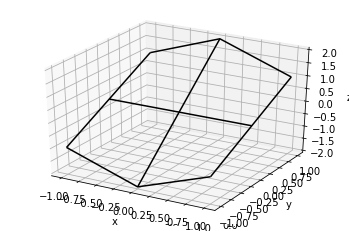

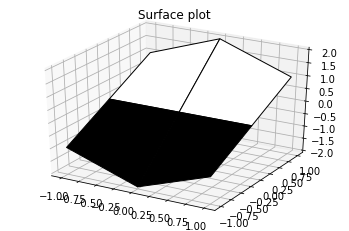

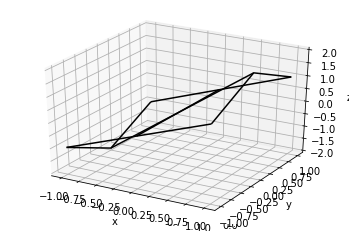

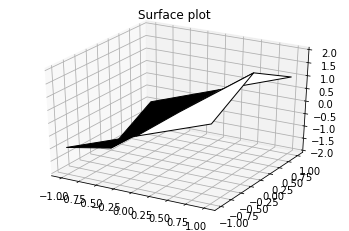

In [ ]:
X = [-1, -1, -1, 
      0,  0,  0, 
      1,  1,  1]

Y = [-1, 0, 1, 
     -1, 0, 1, 
     -1, 0, 1]

XZ =[-1, 0, 1, 
     -2, 0, 2, 
     -1, 0, 1]
     
YZ =[-1, -2, -1,
      0,  0, 0, 
      1,  2, 1]

plot_graph(X, Y, XZ)
plot_graph(X, Y, YZ)

# **Laplacian of Gaussian**

In [ ]:
def create_laplacian_gaussian_filter(M , N, q):

    if (M % 2)==0:
        print('M =',M,'Dimention Should be the even value.')
        return None
    
    if (N % 2)==0:
        print('N = ',N,'Dimention Should be the even value.')
        return None
    
    log_X_filter = np.full((N, M), fill_value = 0.0)
    log_Y_filter = np.full((N, M), fill_value = 0.0)

    cX = N // 2
    cY = N // 2 

    X = []
    Y = []
    XZ = []
    YZ = []
    
    for i in range(0, M):
        for j in range(0, N):
            x = i - cX 
            y = j - cY
            
            valX = round (((x**2 - q**2) / (2 * np.pi * q**6))* np.exp(-(x**2 + y**2)/ (2 * q**2)) , 4)
            valY = round (((y**2 - q**2) / (2 * np.pi * q**6))* np.exp(-(x**2 + y**2)/ (2 * q**2)) , 4)
             
            log_X_filter[i, j] = valX
            log_Y_filter[i, j] = valY
            
            X.append(x)
            Y.append(y)
            XZ.append(valX)
            YZ.append(valY)
      
    plot_graph(X, Y, XZ)
    plot_graph(X, Y, YZ)
    return log_X_filter, log_Y_filter

## Laplacian of Gaussian of size 3×3 (LoG)

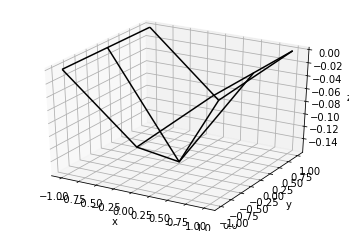

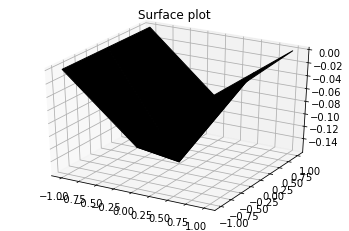

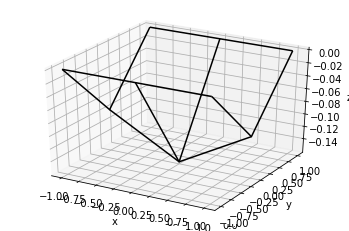

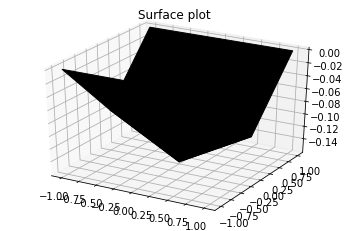

In [ ]:
X = 3
Y = 3
sigma =  1
gFltr = create_laplacian_gaussian_filter(X, Y, sigma)

## Laplacian of Gaussian of size 7×7 (LoG)

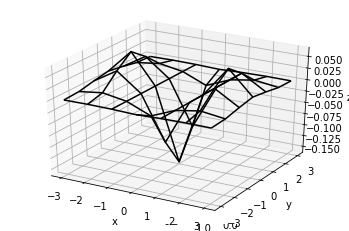

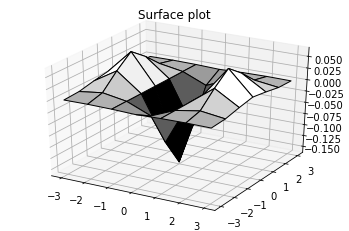

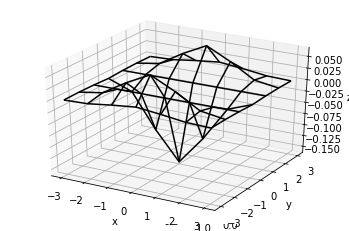

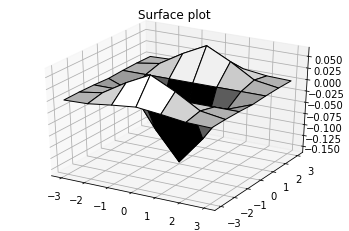

(array([[ 0.0002,  0.0019,  0.0086,  0.0141,  0.0086,  0.0019,  0.0002],
       [ 0.0007,  0.0087,  0.0392,  0.0646,  0.0392,  0.0087,  0.0007],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [-0.0018, -0.0215, -0.0965, -0.1592, -0.0965, -0.0215, -0.0018],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.0007,  0.0087,  0.0392,  0.0646,  0.0392,  0.0087,  0.0007],
       [ 0.0002,  0.0019,  0.0086,  0.0141,  0.0086,  0.0019,  0.0002]]), array([[ 0.0002,  0.0007,  0.    , -0.0018,  0.    ,  0.0007,  0.0002],
       [ 0.0019,  0.0087,  0.    , -0.0215,  0.    ,  0.0087,  0.0019],
       [ 0.0086,  0.0392,  0.    , -0.0965,  0.    ,  0.0392,  0.0086],
       [ 0.0141,  0.0646,  0.    , -0.1592,  0.    ,  0.0646,  0.0141],
       [ 0.0086,  0.0392,  0.    , -0.0965,  0.    ,  0.0392,  0.0086],
       [ 0.0019,  0.0087,  0.    , -0.0215,  0.    ,  0.0087,  0.0019],
       [ 0.0002,  0.0007,  0.    , -0.0018,  0.    ,  0.0007,

In [ ]:
X = 7
Y = 7
sigma =  1
gFltr = create_laplacian_gaussian_filter(X, Y, sigma)
print(gFltr)